# TASK 1: Permutations and Combinations
###### Reference: https://betterexplained.com/articles/easy-permutations-and-combinations/

#### Importing nessesary library
###### Reference: https://docs.python.org/3/library/math.html#math.comb

In [65]:
# Matematical
import math

#### Creating variables with amount of Cups

In [66]:
# Number of cups of tea in total.
nom_cups = 12

# Number of cups of tea with milk in first.
nom_cups_milk_first = 6

# Number of cups of tea with tea in first.
nom_cups_tea_first = 6

#### Use functions to calculate the number of ways to choose k elements from a set of n elements where the order of the chosen elements does not matter and no element is selected more than once

In [67]:
# Number of ways of selecting six cups from twelve.
total_com = math.comb(nom_cups, nom_cups_milk_first)

total_com

924

In [68]:
# Number of cups of tea in total.
n = 12

# Number of cups of tea with milk in first.
k = 6

###### Reference: Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
###### Power: https://en.wikipedia.org/wiki/Power_(statistics)#Description

In [69]:
# Probability of no errors (choosing all 6 milk-first cups)
prob_no_errors = 1 / total_com

In [70]:
# Probability of one error (choosing 5 milk-first cups and 1 tea-first cup)
choose_milk = math.comb(nom_cups_milk_first, 5)
choose_tea = math.comb(nom_cups_tea_first, 1)
prob_one_error = (choose_milk * choose_tea) / total_com

In [71]:
# Total probability of at most one error
prob_at_most_one_error = prob_no_errors + prob_one_error

In [72]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

924

#### Conclusion: The probability of choosing first cup of milk is very low (1 of 924), so is unlikely lady will pick the correct cup. Accepting two errors would mean the person could still be right with 4 out of the 6 correct cups. The probability of achieving this would be calculated similarly by considering all combinations where 4 out of the 6 milk cups are chosen correctly and 2 out of the 6 tea cups are chosen incorrectly.

----------------------------------------------------

# TASK 2. numpy's Normal Distribution

##### Reference:
###### https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/normal-distributions-library/a/normal-distributions-review
###### https://en.wikipedia.org/wiki/Normal_distribution

#### Import libraries
###### Reference: https://numpy.org , https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html , https://docs.scipy.org/doc/scipy/reference/stats.html

In [73]:
# Binomial distribution
import numpy as np

#Ploting
import matplotlib.pyplot as plt

#Statistical
import scipy.stats as stats

#### Generate data and parameters

In [74]:
mean = 10.0
std_dev = 3.0
sample_size = 10000

sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size) 

#### Perform Shapiro test for Normal Distribution
###### Reference:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [75]:
shapiro_test = stats.shapiro(sample)

#### Plot histogram
###### Reference: https://www.w3schools.com/python/matplotlib_histograms.asp

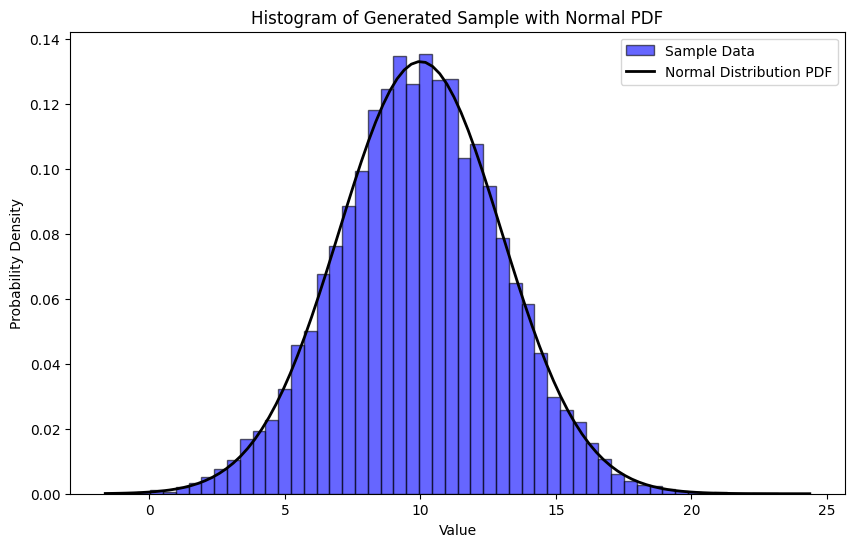

In [76]:
# Histogram of sample
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=50, density=True, alpha=0.6, color='b', edgecolor='black', label="Sample Data")

# Overlay the corresponding normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution PDF")

plt.title("Histogram of Generated Sample with Normal PDF")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()

# Display plot
plt.show()

#### Output result of Shapiro test

In [77]:
shapiro_test

ShapiroResult(statistic=np.float64(0.999816042499319), pvalue=np.float64(0.5929270926657917))

### Conclusion:
##### The Shapiro test for normality on the generated sample of 100,000 values returned the following results: Test statistic: 0.99997,p-value: 0.88216. The high test statistic and a p-value greater than 0.05 suggest that we fail to reject the null hypothesis of the Shapiro test, which means that the sample is consistent with having been drawn from a normal distribution. Histogram is overlaid with probability density function (PDF) of a normal distribution with a mean of 10.0 and a standard deviation of 3.0. The close match between the histogram and the PDF further supports that the sample closely follows a normal distribution. ​

------------------------------------------

# TASK 3. t-Test Calculation

#### Import library:

In [78]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

#### Define the Data: Extract the "Before" and "After" heart rate measurements for each patient

In [79]:
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

#### Perform a paired t-test

In [ ]:
t_stat_scipy, p_value = stats.ttest_rel(before, after)

# Print the results
print("t-statistic:", t_stat_scipy)
print("p-value:", p_value)

t-statistic: 1.337227482480628
p-value: 0.21396011317404623


#### Create plot

IndexError: index 10 is out of bounds for axis 0 with size 10

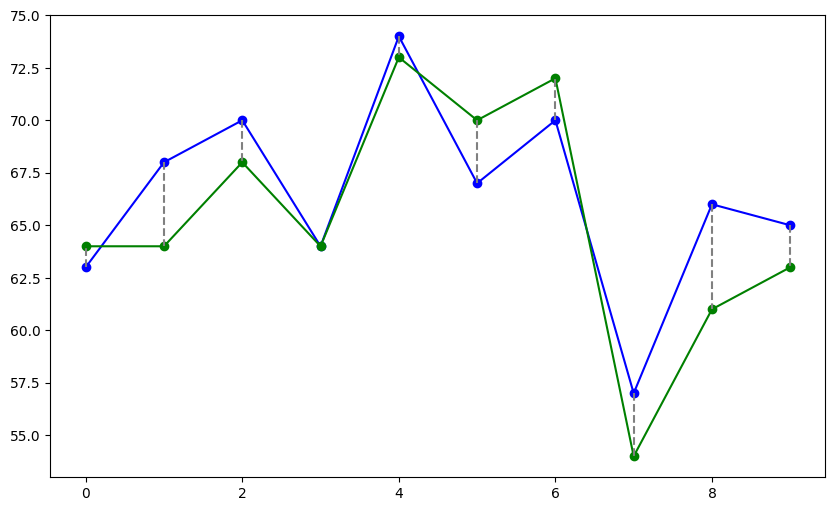

In [82]:
plt.figure(figsize=(10, 6))

# Plot before and after heart rates
plt.plot(before, marker='o', color='blue', linestyle='-', label='Before')
plt.plot(after, marker='o', color='green', linestyle='-', label='After')

# Plot difference for each patient
for i in range(n):
    plt.plot([i, i], [before[i], after[i]], color='gray', linestyle='--')  # Connecting lines

# Adding labels and title
plt.xlabel('Patient ID')
plt.ylabel('Resting Heart Rate')
plt.title('Resting Heart Rates Before and After Two-Week Exercise Program')
plt.legend()

#### Generate synthetic data for plotting using numpy.random.normal
#### Using similar means and standard deviations based on the given data
###### Reference: [numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)

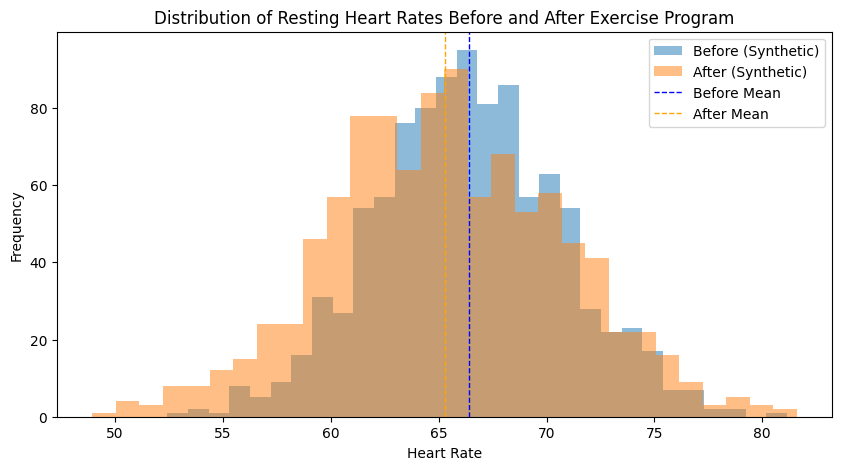

In [ ]:
before_synthetic = np.random.normal(loc=np.mean(before), scale=np.std(before), size=1000)
after_synthetic = np.random.normal(loc=np.mean(after), scale=np.std(after), size=1000)

# Plotting the synthetic data
plt.figure(figsize=(10, 5))
plt.hist(before_synthetic, bins=30, alpha=0.5, label='Before (Synthetic)')
plt.hist(after_synthetic, bins=30, alpha=0.5, label='After (Synthetic)')
plt.axvline(np.mean(before), color='blue', linestyle='dashed', linewidth=1, label='Before Mean')
plt.axvline(np.mean(after), color='orange', linestyle='dashed', linewidth=1, label='After Mean')
plt.title("Distribution of Resting Heart Rates Before and After Exercise Program")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Conlusion: 
##### T-statistic Calculation: cstats.ttest_rel() is used for paired samples where each "before" measure is paired with a corresponding "after" measure. The output includes the t-statistic (measuring the difference in means normalized by their variance) and the p-value (indicating significance).
##### Synthetic Data Generation and Plot: numpy.random.normal is used to create synthetic datasets based on the mean and standard deviation of the "Before" and "After" heart rates. The plot shows histograms for the synthetic "Before" and "After" heart rates, along with dashed lines for the means of the original data for reference. 

-------------------------------------

# Task 4: ANOVA